In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data_samples/cardio_train.csv' , sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
X = df.iloc[... , 1:-1]
y= df.iloc[... , -1]
np.shape(X)

(70000, 11)

In [5]:
y = pd.get_dummies(y)

In [6]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=33123)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu' , input_shape = (11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 30)                360       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________


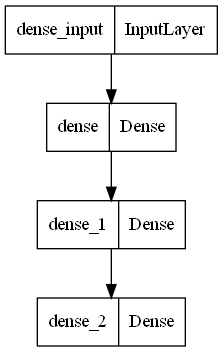

In [8]:
plot_model(model)

In [9]:

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
525/525 [==============================] - 1s 2ms/step - loss: 271.7748 - categorical_accuracy: 0.5047 - val_loss: 1.4298 - val_categorical_accuracy: 0.5051
Epoch 2/10
525/525 [==============================] - 1s 1ms/step - loss: 12.0577 - categorical_accuracy: 0.5073 - val_loss: 4.8216 - val_categorical_accuracy: 0.5047
Epoch 3/10
525/525 [==============================] - 1s 2ms/step - loss: 14.4309 - categorical_accuracy: 0.5023 - val_loss: 29.5453 - val_categorical_accuracy: 0.5056
Epoch 4/10
525/525 [==============================] - 1s 1ms/step - loss: 11.6457 - categorical_accuracy: 0.5071 - val_loss: 6.3436 - val_categorical_accuracy: 0.5057
Epoch 5/10
525/525 [==============================] - 1s 2ms/step - loss: 11.6474 - categorical_accuracy: 0.5052 - val_loss: 16.9394 - val_categorical_accuracy: 0.5056
Epoch 6/10
525/525 [==============================] - 1s 2ms/step - loss: 9.0400 - categorical_accuracy: 0.5110 - val_loss: 18.7117 - val_categorical_accuracy: 0.

In [11]:
yr = df.iloc[... , -1]
np.unique(yr, return_counts=True)

(array([0, 1], dtype=int64), array([35021, 34979], dtype=int64))

In [12]:

rfc = RandomForestClassifier(n_estimators=200)
Xr = df.iloc[... , 1:-1]
yr= df.iloc[... , -1]
yr = pd.get_dummies(y)
Xr_train , Xr_test , yr_train , yr_test = train_test_split(Xr,yr,random_state=33123)

In [13]:
rfc.fit(Xr_train, yr_train)

RandomForestClassifier(n_estimators=200)

In [14]:
y_pred = rfc.predict(Xr_test)

In [15]:
print(classification_report(y_true=yr_test , y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      8652
           1       0.72      0.70      0.71      8848

   micro avg       0.72      0.71      0.71     17500
   macro avg       0.72      0.71      0.71     17500
weighted avg       0.72      0.71      0.71     17500
 samples avg       0.71      0.71      0.71     17500



c:\Users\ASUS\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu' , input_shape = (11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 30)                360       
                                                                 
 dense_5 (Dense)             (None, 60)                1860      
                                                                 
 dense_6 (Dense)             (None, 25)                1525      
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                                 
Total params: 3,929
Trainable params: 3,929
Non-trainable params: 0
_________________________________________________________________


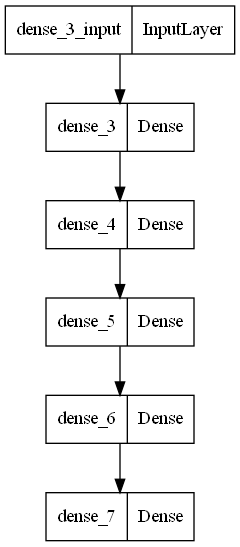

In [17]:
plot_model(model)

In [18]:

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [20]:
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
525/525 [==============================] - 1s 2ms/step - loss: 1.2550 - categorical_accuracy: 0.5945 - val_loss: 0.6278 - val_categorical_accuracy: 0.7039
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 1.1627 - categorical_accuracy: 0.5923 - val_loss: 1.5473 - val_categorical_accuracy: 0.5122
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 1.3069 - categorical_accuracy: 0.5814 - val_loss: 1.6792 - val_categorical_accuracy: 0.5087
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 0.9597 - categorical_accuracy: 0.6103 - val_loss: 0.6121 - val_categorical_accuracy: 0.7036
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 0.9262 - categorical_accuracy: 0.6109 - val_loss: 0.6258 - val_categorical_accuracy: 0.6954
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 0.9543 - categorical_accuracy: 0.6049 - val_loss: 0.6742 - val_categorical_accuracy: 0.6537
Epoc